# Think Bayes

This notebook presents code and exercises from Think Bayes, second edition.

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

import math
import numpy as np

from thinkbayes2 import Hist, Pmf, Suite, Beta
import thinkplot

### The Alien Blaster problem

In preparation for an alien invasion, the Earth Defense League (EDL) has been working on new missiles to shoot down space invaders.  Of course, some missile designs are better than others; let's assume that each design has some probability of hitting an alien ship, x.

Based on previous tests, the distribution of x in the population of designs is well described by a Beta distribution with parameters 5, 10.

Now suppose the new ultra-secret Alien Blaster 9000 is being tested.  In a press conference, an EDL general reports that the new design has been tested twice, taking two shots during each test.  The results of the test are confidential, so the general won't say how many targets were hit, but they report: "The same number of targets were hit in the two tests, so we have reason to think this new design is consistent."

Is this data good or bad; that is, does it increase or decrease your estimate of x for the Alien Blaster 9000?

0.3333333333333333

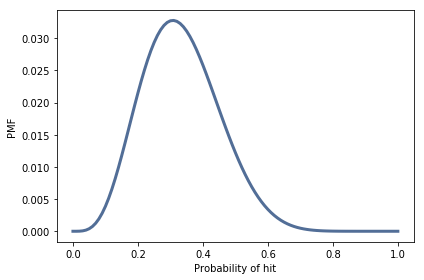

In [2]:
# Solution

# Here's the prior

prior = Beta(5, 10)
thinkplot.Pdf(prior.MakePmf())
thinkplot.decorate(xlabel='Probability of hit',
                   ylabel='PMF')
prior.Mean()

In [3]:
# Solution

# And here's the likelhood function

from scipy.stats import binom

class AlienBlaster(Suite):
    
    def Likelihood(self, data, hypo):
        """Computes the likeliood of data under hypo.
        
        data: number of shots they took
        hypo: probability of a hit, p
        """
        n = data
        x = hypo
        
        # specific version for n=2 shots
        likes = [x**4, (1-x)**4, (2*x*(1-x))**2]

        # general version for any n shots
        likes = [binom.pmf(k, n, x)**2 for k in range(n+1)]
        
        return np.sum(likes)

In [ ]:
np.

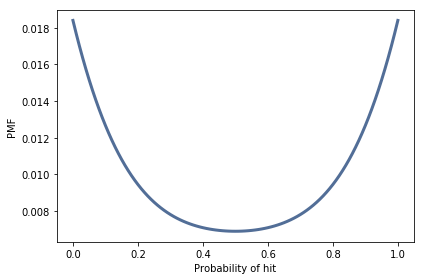

In [4]:
# Solution

# If we start with a uniform prior, 
# we can see what the likelihood function looks like:

pmf = Beta(1, 1).MakePmf()
blaster = AlienBlaster(pmf)
blaster.Update(2)
thinkplot.Pdf(blaster)
thinkplot.decorate(xlabel='Probability of hit',
                   ylabel='PMF')

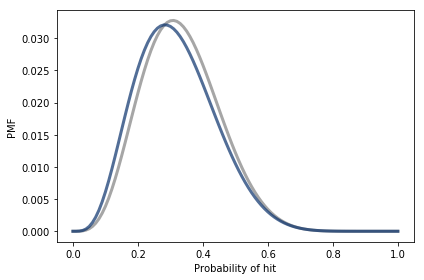

In [5]:
# Solution

# Now let's run it with the specified prior and 
# see what happens when we multiply the convex prior and 
# the concave posterior.

pmf = Beta(5, 10).MakePmf()
blaster = AlienBlaster(pmf)
thinkplot.Pdf(blaster, color='gray')
blaster.Update(2)
thinkplot.Pdf(blaster)
thinkplot.decorate(xlabel='Probability of hit',
                   ylabel='PMF')

In [6]:
# Solution

# The posterior mean is lower

prior.Mean(), blaster.Mean()

(0.3333333333333333, 0.3175635713858314)

In [7]:
# Solution

# So is the MAP

prior.MAP(), blaster.MAP()

(0.3076923076923077, 0.28)

In [8]:
# So if we learn that the new design is "consistent",
# it is more likely to be consistently bad (in this case).

### Part Two

Suppose we
have we have a stockpile of 3 Alien Blaster 9000s and 7 Alien
Blaster 10Ks.  After extensive testing, we have concluded that
the AB9000 hits the target 30% of the time, precisely, and the
AB10K hits the target 40% of the time.

If I grab a random weapon from the stockpile and shoot at 10 targets,
what is the probability of hitting exactly 3?  Again, you can write a
number, mathematical expression, or Python code.

In [9]:
k = 3
n = 10
x1 = 0.3
x2 = 0.4

0.3 * binom.pmf(k, n, x1) + 0.7 * binom.pmf(k, n, x2)

0.23054197320000014

The answer is a value drawn from the mixture of the two distributions.

Continuing the previous problem, let's estimate the distribution
of `k`, the number of successful shots out of 10.  

1. Write a few lines of Python code to simulate choosing a random weapon and firing it.

2. Write a loop that simulates the scenario and generates random values of `k` 1000 times.  

3. Store the values of `k` you generate and plot their distribution.

In [10]:
def flip(p):
    return np.random.random() < p

def simulate_shots(n, p):
    return np.random.binomial(n, p)

ks = []
for i in range(1000):
    if flip(0.3):
        k = simulate_shots(n, x1)
    else:
        k = simulate_shots(n, x2)
    ks.append(k)

Here's what the distribution looks like.

(1000, 3.775)

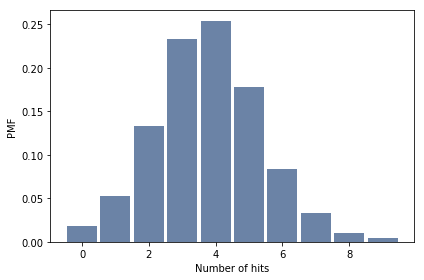

In [11]:
pmf = Pmf(ks)
thinkplot.Hist(pmf)
thinkplot.decorate(xlabel='Number of hits',
                   ylabel='PMF')
len(ks), np.mean(ks)

The mean should be near 3.7.  We can run this simulation more efficiently using NumPy.  First we generate a sample of `xs`:

In [12]:
xs = np.random.choice(a=[x1, x2], p=[0.3, 0.7], size=1000)
Hist(xs)

Hist({0.4: 717, 0.3: 283})

Then for each `x` we generate a `k`:

In [13]:
ks = np.random.binomial(n, xs);

And the results look similar.

3.737

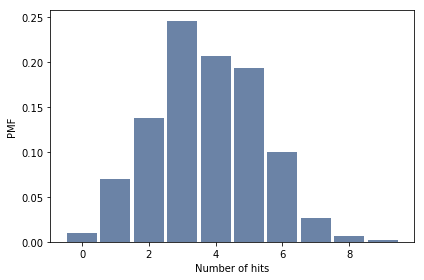

In [14]:
pmf = Pmf(ks)
thinkplot.Hist(pmf)
thinkplot.decorate(xlabel='Number of hits',
                   ylabel='PMF')
np.mean(ks)

One more way to do the same thing is to make a meta-Pmf, which contains the two binomial `Pmf` objects:

In [15]:
from thinkbayes2 import MakeBinomialPmf

pmf1 = MakeBinomialPmf(n, x1)
pmf2 = MakeBinomialPmf(n, x2)

metapmf = Pmf({pmf1:0.3, pmf2:0.7})
metapmf.Print()

Pmf({0: 0.028247524900000005, 1: 0.12106082100000018, 2: 0.2334744405, 3: 0.26682793200000016, 4: 0.20012094900000013, 5: 0.10291934520000007, 6: 0.03675690899999999, 7: 0.009001692000000002, 8: 0.0014467004999999982, 9: 0.00013778100000000015, 10: 5.904899999999995e-06}) 0.3
Pmf({0: 0.0060466176, 1: 0.04031078400000004, 2: 0.12093235199999994, 3: 0.21499084800000012, 4: 0.2508226560000002, 5: 0.20065812480000034, 6: 0.11147673600000013, 7: 0.04246732800000004, 8: 0.010616832, 9: 0.0015728640000000028, 10: 0.00010485760000000014}) 0.7


Here's how we can draw samples from the meta-Pmf:

In [16]:
ks = [metapmf.Random().Random() for _ in range(1000)];

And here are the results, one more time:

3.605

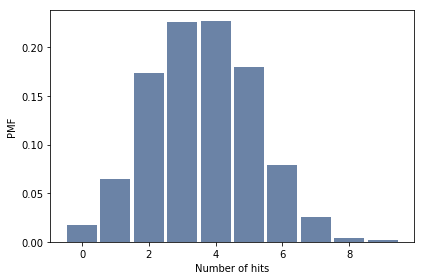

In [17]:
pmf = Pmf(ks)
thinkplot.Hist(pmf)
thinkplot.decorate(xlabel='Number of hits',
                   ylabel='PMF')
np.mean(ks)

This result, which we have estimated three ways, is a predictive distribution, based on our uncertainty about `x`.

We can compute the mixture analtically using `thinkbayes2.MakeMixture`:


    def MakeMixture(metapmf, label='mix'):
        """Make a mixture distribution.

        Args:
          metapmf: Pmf that maps from Pmfs to probs.
          label: string label for the new Pmf.

        Returns: Pmf object.
        """
        mix = Pmf(label=label)
        for pmf, p1 in metapmf.Items():
            for k, p2 in pmf.Items():
                mix[k] += p1 * p2
        return mix
        
The outer loop iterates through the Pmfs; the inner loop iterates through the items.

So `p1` is the probability of choosing a particular Pmf; `p2` is the probability of choosing a value from the Pmf.

In the example, each Pmf is associated with a value of `x` (probability of hitting a target).  The inner loop enumerates the values of `k` (number of targets hit after 10 shots).

3.700000000000003

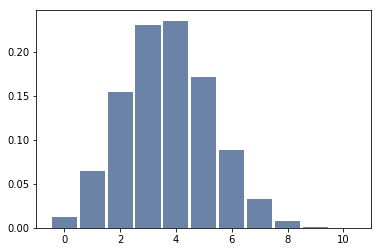

In [18]:
from thinkbayes2 import MakeMixture

mix = MakeMixture(metapmf)
thinkplot.Hist(mix)
mix.Mean()

In [19]:
mix[3]

0.23054197320000014

**Exercise**: Assuming again that the distribution of `x` in the population of designs is well-modeled by a beta distribution with parameters α=2 and β=3, what the distribution if `k` if I choose a random Alien Blaster and fire 10 shots?